# imports

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# magic lines
%load_ext autoreload
%autoreload 2
%matplotlib inline

## import my scripts

In [2]:
#import from my data.py
#https://stackoverflow.com/a/57790804/6163759

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    scripts_path = os.path.join(module_path, "scripts")
    if scripts_path not in sys.path:
        sys.path.append(scripts_path)
    display(sys.path)
    
from data import get_data
from preprocessing import main

['/home/louis/code/JammyNinja/Sandbox/Chess_analysis/notebooks',
 '/home/louis/code/lewagon/data/04-Decision-Science/01-Project-Setup/context-and-setup',
 '/home/louis/code/JammyNinja/Sandbox/Chess_analysis/notebooks',
 '/home/louis/.pyenv/versions/3.10.6/lib/python310.zip',
 '/home/louis/.pyenv/versions/3.10.6/lib/python3.10',
 '/home/louis/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload',
 '',
 '/home/louis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages',
 '/home/louis/code/JammyNinja/Sandbox/Chess_analysis/scripts']

## Load (clean) data

In [3]:
# filename = "select_games_2023-01_to_2024-06_select_cols.csv"
# filepath = os.path.join("..","data", filename)
# all_games_df = pd.read_csv(fileapath)
all_games_df = get_data(df_name = "select_games", descriptor="select_cols")
all_games_df

Looking for all games of chess played on Chess.com by JammyNinja
          between 2023-01 and 2024-11
getting 2023/01
getting 2023/02
getting 2023/03
getting 2023/04
getting 2023/05
getting 2023/06
getting 2023/07
getting 2023/08
getting 2023/09
getting 2023/10
getting 2023/11
getting 2023/12
getting 2024/01
getting 2024/02
getting 2024/03
getting 2024/04
getting 2024/05
getting 2024/06
getting 2024/07
getting 2024/08
getting 2024/09
getting 2024/10
getting 2024/11
Downloaded a total of 4544 games.
saved file as /home/louis/code/JammyNinja/Sandbox/Chess_analysis/data/all_games_2023-01_to_2024-11_raw.csv


,date,start_time,end_time,time_class,time_control,rated,rules,url,moves,final_position_fen,opening_code,opening_name,white_username,black_username,result,white_rating,black_rating,white_result,black_result
0,2023-01-07,2023-01-07 08:17:06,2023-01-07 14:35:53,daily,1/604800,True,chess,https://www.chess.com/game/daily/437377841,1. e4 {[%clk 0:56:50.2] 1... c6 {[%clk 0:27:49...,2r1k2r/pp3ppp/q7/4pb2/1b1P4/1P2B3/1P3PPP/K2R2N...,B10,Caro-Kann-Defense-Hillbilly-Attack-2...d5,sylvainau,JammyNinja,0-1,1298,1461,checkmated,win
1,2023-01-14,2023-01-14 11:34:48,2023-01-14 15:09:28,daily,1/604800,True,chess,https://www.chess.com/game/daily/448245095,1. e4 {[%clk 0:02:24.3] 1... c5 {[%clk 0:15:39...,r2qr3/1b2bpkp/p2p1n2/1p4B1/3Q4/2P2N2/PP3PPP/3R...,B22,Alapin-Sicilian-Defense-2...Nc6-3.d4,JammyNinja,Timkee,0-1,1429,1234,timeout,win
2,2023-01-30,2023-01-30 17:32:36,2023-01-30 07:50:02,daily,1/604800,True,chess,https://www.chess.com/game/daily/436095119,1. e4 {[%clk 0:02:06.5] 1... c6 {[%clk 0:27:48...,rr4k1/3n2pp/2p2p2/p2pp3/P7/1P5P/1RPPNPP1/5RK1 ...,B10,Caro-Kann-Defense-2.Nf3-d5-3.exd5-cxd5,ELNAHAS4,JammyNinja,0-1,1427,1449,timeout,win
3,2023-01-30,2023-01-30 21:29:25,2023-01-30 21:39:52,blitz,300,True,chess,https://www.chess.com/game/live/68853253455,1. Nf3 {[%clk 0:04:54.9] 1... d5 {[%clk 0:04:5...,8/8/4K3/8/8/8/4Q3/6k1 b - -,A09,Reti-Opening-Reti-Gambit-Accepted,ivangard57,JammyNinja,1-0,1022,1030,win,timeout
4,2023-02-07,2023-02-07 20:18:19,2023-02-07 19:25:50,daily,1/604800,True,chess,https://www.chess.com/game/daily/472634081,1. c4 {[%clk 0:18:46.2] 1... e5 {[%clk 4:14:19...,rnbqk1nr/pppp1ppp/8/2b1p3/2P5/2N2P2/PP1PP1PP/R...,A21,English-Opening-Reversed-Sicilian-Variation,ajbouchie,JammyNinja,1/2-1/2,1584,1449,agreed,agreed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,2024-11-05,2024-11-05 14:52:33,2024-11-05 14:54:37,bullet,60,True,chess,https://www.chess.com/game/live/124557516553,1. e4 {[%clk 0:01:00] 1... e5 {[%clk 0:01:00] ...,8/pp4p1/2n5/5k2/3p1B1p/P2P1P2/2P2KP1/6N1 w - -,C26,Vienna-Game-Falkbeer-Variation,JammyNinja,Aakula22,0-1,1349,1370,timeout,win
4540,2024-11-05,2024-11-05 14:54:40,2024-11-05 14:56:44,bullet,60,True,chess,https://www.chess.com/game/live/124557542239,1. e4 {[%clk 0:01:00] 1... d5 {[%clk 0:01:00] ...,8/4RN2/7p/8/5R2/7P/P1r2kPK/8 b - -,B01,Scandinavian-Defense-Mieses-Kotrc-Variation......,Aakula22,JammyNinja,1-0,1378,1341,win,checkmated
4541,2024-11-05,2024-11-05 14:56:47,2024-11-05 14:59:00,bullet,60,True,chess,https://www.chess.com/game/live/124557568389,1. e4 {[%clk 0:01:00] 1... e5 {[%clk 0:00:59.9...,6r1/1qkr4/2pp4/8/7P/P3p2K/1P4P1/2R5 b - -,C26,Vienna-Game-Falkbeer-Stanley-Variation-3...Bc5,JammyNinja,Aakula22,1-0,1350,1369,win,timeout
4542,2024-11-05,2024-11-05 14:59:05,2024-11-05 14:59:42,bullet,60,True,chess,https://www.chess.com/game/live/124557596139,1. e4 {[%clk 0:01:00] 1... d5 {[%clk 0:01:00] ...,r3k2r/pp1nQpb1/2p2pbp/8/3P4/3B1NN1/qPP2PPP/2KR...,D00,Queens-Pawn-Opening-Blackmar-Diemer-von-Popiel...,Aakula22,JammyNinja,1-0,1377,1342,win,checkmated


In [12]:
recent_df = all_games_df.tail(3                            )
recent_df

,date,start_time,end_time,time_class,time_control,rated,rules,url,moves,final_position_fen,opening_code,opening_name,white_username,black_username,result,white_rating,black_rating,white_result,black_result
4541,2024-11-05,2024-11-05 14:56:47,2024-11-05 14:59:00,bullet,60,True,chess,https://www.chess.com/game/live/124557568389,1. e4 {[%clk 0:01:00] 1... e5 {[%clk 0:00:59.9...,6r1/1qkr4/2pp4/8/7P/P3p2K/1P4P1/2R5 b - -,C26,Vienna-Game-Falkbeer-Stanley-Variation-3...Bc5,JammyNinja,Aakula22,1-0,1350,1369,win,timeout
4542,2024-11-05,2024-11-05 14:59:05,2024-11-05 14:59:42,bullet,60,True,chess,https://www.chess.com/game/live/124557596139,1. e4 {[%clk 0:01:00] 1... d5 {[%clk 0:01:00] ...,r3k2r/pp1nQpb1/2p2pbp/8/3P4/3B1NN1/qPP2PPP/2KR...,D00,Queens-Pawn-Opening-Blackmar-Diemer-von-Popiel...,Aakula22,JammyNinja,1-0,1377,1342,win,checkmated
4543,2024-11-05,2024-11-05 15:00:05,2024-11-05 15:02:08,bullet,60,True,chess,https://www.chess.com/game/live/124557608263,1. e4 {[%clk 0:01:00] 1... c5 {[%clk 0:01:00] ...,3Q4/p5pp/8/4np2/3R1k2/P1P5/1P3PPP/6K1 b - -,B30,Sicilian-Defense-Nyezhmetdinov-Rossolimo-Attac...,JammyNinja,apolon776,1-0,1350,1353,win,checkmated


In [13]:
preproc_df = main()
preproc_df = get_data("select_games", "select_cols")

Getting raw data to be preprocessed...
Looking for all games of chess played on Chess.com by JammyNinja
          between 2023-01 and 2024-11
file /home/louis/code/JammyNinja/Sandbox/Chess_analysis/data/all_games_2023-01_to_2024-11_raw.csv already exists!
Do you want to download all games again?
>>(Have you played more since last running this?)
y/n:n
Created win/rating columns:
- higher_rated_colour
- winner
- winner_rating_diff
- user_rating_diff
- user_rating
- user_win
- user_colour
Created moves columns:
- move_numbers
- white_moves
- white_clock
- black_moves
- black_clock
- w_cstl_side
- w_cstl_move
- b_cstl_side
- b_cstl_move
Created final position columns:
- winner_ttl_pieces_count
- loser_ttl_pieces_count
- winner_pawns_count
- loser_pawns_count
- winner_pieces_only_count
- loser_pieces_only_count
- pieces_count_diff
- pawns_count_diff
- winner_material_ttl
- loser_material_ttl
- winner_pcs
- loser_pcs
Created castling columns:
- user_castled
- opp_castled

Started with:
- dat

In [14]:
display(preproc_df.columns)
all_games_df = preproc_df.copy()

Index(['date', 'url', 'start_time', 'end_time', 'time_class', 'time_control',
       'white_username', 'black_username', 'user_colour', 'user_rating',
       'result', 'winner', 'higher_rated_colour', 'white_rating',
       'black_rating', 'white_result', 'black_result', 'winner_rating_diff',
       'user_rating_diff', 'opening_name', 'opening_code', 'w_cstl_side',
       'w_cstl_move', 'b_cstl_side', 'b_cstl_move', 'user_castled',
       'opp_castled', 'winner_ttl_pieces_count', 'loser_ttl_pieces_count',
       'winner_pawns_count', 'loser_pawns_count', 'winner_pieces_only_count',
       'loser_pieces_only_count', 'pieces_count_diff', 'pawns_count_diff',
       'winner_material_ttl', 'loser_material_ttl', 'winner_pcs', 'loser_pcs',
       'user_win'],
      dtype='object')

In [15]:
test_game = all_games_df.iloc[10]
test_game

date                                                               2023-05-18
url                               https://www.chess.com/game/live/78138789735
start_time                                                2023-05-18 08:52:47
end_time                                                  2023-05-18 08:53:41
time_class                                                              rapid
time_control                                                            600+5
white_username                                                     JammyNinja
black_username                                                  cippeciop2005
user_colour                                                             white
user_rating                                                              1294
result                                                                    1-0
winner                                                                  white
higher_rated_colour                                             

# Rating evolution over time, per game (not per day)

In [16]:
all_games_df

,date,url,start_time,end_time,time_class,time_control,white_username,black_username,user_colour,user_rating,...,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs,user_win
0,2023-01-30,https://www.chess.com/game/live/68853253455,2023-01-30 21:29:25,2023-01-30 21:39:52,blitz,300,ivangard57,JammyNinja,black,1030,...,0,1,0,1,0,9,0,"['K', 'Q']",['k'],False
1,2023-03-15,https://www.chess.com/game/live/72649318887,2023-03-15 19:56:11,2023-03-15 20:02:18,blitz,300,axdasilva129,JammyNinja,black,1057,...,1,2,0,2,3,12,1,"['p', 'p', 'p', 'p', 'n', 'k', 'r']","['P', 'K']",True
2,2023-03-25,https://www.chess.com/game/live/73488582235,2023-03-25 13:03:42,2023-03-25 13:11:44,blitz,300,Bhashyam2K23,JammyNinja,black,1036,...,2,2,1,1,3,19,7,"['P', 'P', 'Q', 'P', 'P', 'P', 'R', 'K']","['k', 'p', 'p', 'r']",False
3,2023-03-29,https://www.chess.com/game/live/73819849367,2023-03-29 09:06:37,2023-03-29 09:12:33,blitz,300,JammyNinja,callmedaddycool,white,1034,...,0,7,0,7,0,25,0,"['r', 'r', 'n', 'k', 'n', 'n', 'n', 'b']",['K'],False
4,2023-04-04,https://www.chess.com/game/live/74361801303,2023-04-04 15:38:52,2023-04-04 16:05:50,rapid,600+5,JammyNinja,danderosalia,white,1257,...,4,2,1,1,-2,16,9,"['R', 'Q', 'P', 'K', 'P']","['k', 'p', 'p', 'p', 'p', 'r']",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,2024-11-05,https://www.chess.com/game/live/124557516553,2024-11-05 14:52:33,2024-11-05 14:54:37,bullet,60,JammyNinja,Aakula22,white,1349,...,5,1,2,-1,0,8,11,"['p', 'p', 'p', 'n', 'k', 'p', 'p']","['B', 'P', 'P', 'P', 'P', 'K', 'P', 'N']",False
4420,2024-11-05,https://www.chess.com/game/live/124557542239,2024-11-05 14:54:40,2024-11-05 14:56:44,bullet,60,Aakula22,JammyNinja,black,1341,...,1,3,1,2,2,16,6,"['R', 'N', 'R', 'P', 'P', 'P', 'K']","['p', 'r', 'k']",False
4421,2024-11-05,https://www.chess.com/game/live/124557568389,2024-11-05 14:56:47,2024-11-05 14:59:00,bullet,60,JammyNinja,Aakula22,white,1350,...,3,1,3,-2,1,9,22,"['P', 'P', 'K', 'P', 'P', 'R']","['r', 'q', 'k', 'r', 'p', 'p', 'p']",True
4422,2024-11-05,https://www.chess.com/game/live/124557596139,2024-11-05 14:59:05,2024-11-05 14:59:42,bullet,60,Aakula22,JammyNinja,black,1342,...,6,6,6,0,0,34,34,"['Q', 'P', 'B', 'N', 'N', 'P', 'P', 'P', 'P', ...","['r', 'k', 'r', 'p', 'p', 'n', 'p', 'b', 'p', ...",False


In [17]:
rating_df = all_games_df[["date", "user_rating", "time_class"]].copy()

rating_df.sort_values(by="date", ascending=True, inplace=True)

display(rating_df.value_counts("time_class"))
rating_df.head(10)

time_class
bullet    2812
blitz     1600
rapid       12
dtype: int64

,date,user_rating,time_class
0,2023-01-30,1030,blitz
1,2023-03-15,1057,blitz
2,2023-03-25,1036,blitz
3,2023-03-29,1034,blitz
4,2023-04-04,1257,rapid
5,2023-04-16,1277,rapid
6,2023-04-17,1296,rapid
7,2023-04-26,1251,rapid
8,2023-05-03,1287,rapid
9,2023-05-05,1266,rapid


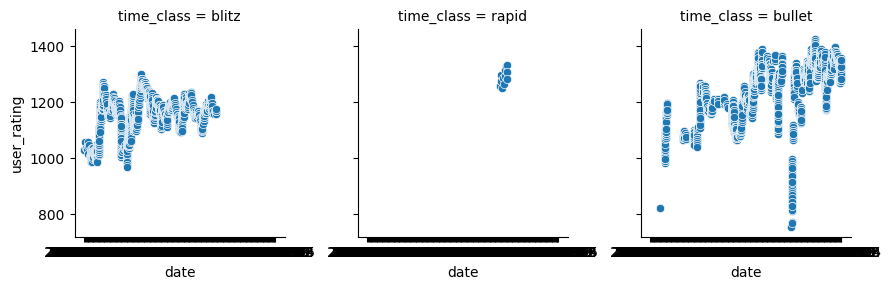

In [18]:
fgrid = sns.FacetGrid(rating_df, col="time_class")
fgrid.map_dataframe(sns.scatterplot, x="date" ,y="user_rating")

In [19]:
rating_df.date.unique()[:10]

array(['2023-01-30', '2023-03-15', '2023-03-25', '2023-03-29',
       '2023-04-04', '2023-04-16', '2023-04-17', '2023-04-26',
       '2023-05-03', '2023-05-05'], dtype=object)

In [20]:
rating_df["game_number"] = rating_df.index

rating_df.groupby(by="date").first()

# rating_df

,user_rating,time_class,game_number
date,,,
2023-01-30,1030,blitz,0
2023-03-15,1057,blitz,1
2023-03-25,1036,blitz,2
2023-03-29,1034,blitz,3
2023-04-04,1257,rapid,4
...,...,...,...
2024-11-01,1361,bullet,4252
2024-11-02,1333,bullet,4261
2024-11-03,1295,bullet,4350


In [21]:
def get_xticks_for_df(df):
    df = df.copy()
    #add game count column
    df["game_count"] = df.index
    #group by date and keep index of first game that day
    dense_df = df.groupby(by="date").first()
    
    locations = dense_df["game_count"].values
    
    dates = pd.to_datetime(dense_df.index)
    
#     ticks = dense_df.index.values
    ticks = dates.strftime('%d/%m/%y')
    
    return ticks, locations
get_xticks_for_df(rating_df)

(Index(['30/01/23', '15/03/23', '25/03/23', '29/03/23', '04/04/23', '16/04/23',
        '17/04/23', '26/04/23', '03/05/23', '05/05/23',
        ...
        '18/10/24', '20/10/24', '26/10/24', '29/10/24', '31/10/24', '01/11/24',
        '02/11/24', '03/11/24', '04/11/24', '05/11/24'],
       dtype='object', name='date', length=226),
 array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          12,   13,   15,   16,   17,   18,   20,   21,   22,   33,   44,
          53,   54,   62,   72,   94,  107,  145,  241,  305,  368,  417,
         434,  491,  500,  501,  502,  504,  513,  514,  518,  524,  528,
         530,  545,  559,  564,  573,  583,  598,  618,  642,  673,  690,
         721,  744,  745,  746,  747,  748,  750,  767,  787,  803,  852,
         907,  973, 1023, 1061, 1140, 1234, 1277, 1296, 1325, 1343, 1365,
        1409, 1456, 1489, 1513, 1517, 1518, 1520, 1542, 1574, 1586, 1596,
        1607, 1608, 1623, 1633, 1653, 1663, 1670, 1671, 1672, 1688, 1705,


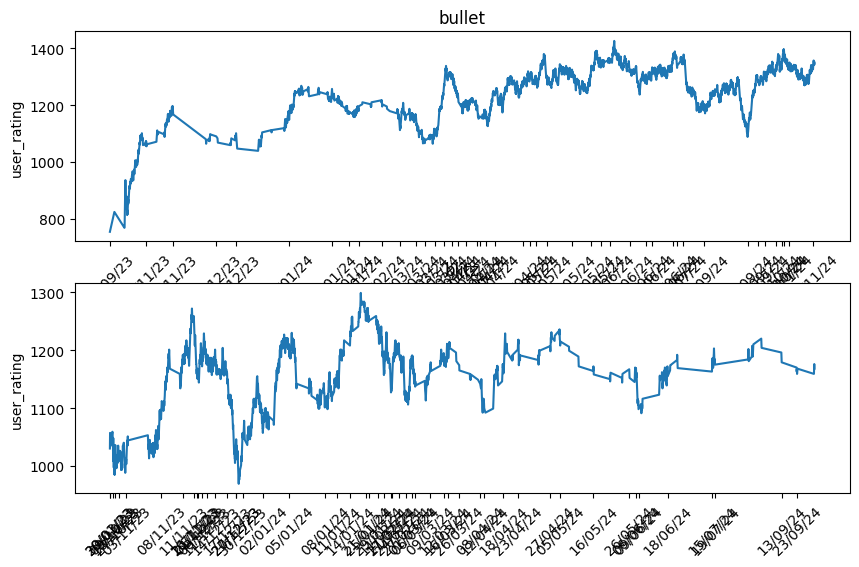

In [22]:
# time_classes = rating_df.value_counts("time_class").index
time_classes = ["bullet", 'blitz']

fig, axs = plt.subplots(len(time_classes), 1, figsize=(10,6)) # axs is a (1,2) nd-array

interval = 3 #choose every other how many

for i,time in enumerate(time_classes):
    #data and plot
    time_df = rating_df[rating_df["time_class"] == time]
    sns.lineplot(data=time_df, x=time_df.index, y=time_df.user_rating, ax=axs[i])
    
    x_ticks, x_locations = get_xticks_for_df(time_df)
    
    #plot aesthetic
    axs[i].set_xticks(x_locations[::interval])
    axs[i].set_xticklabels(x_ticks[::interval])
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_title(time)


Consider plotting dates on y axis and evolving rating vertically like a tree!?

# Material

## pawns at end of match

In [23]:
all_games_df.columns

Index(['date', 'url', 'start_time', 'end_time', 'time_class', 'time_control',
       'white_username', 'black_username', 'user_colour', 'user_rating',
       'result', 'winner', 'higher_rated_colour', 'white_rating',
       'black_rating', 'white_result', 'black_result', 'winner_rating_diff',
       'user_rating_diff', 'opening_name', 'opening_code', 'w_cstl_side',
       'w_cstl_move', 'b_cstl_side', 'b_cstl_move', 'user_castled',
       'opp_castled', 'winner_ttl_pieces_count', 'loser_ttl_pieces_count',
       'winner_pawns_count', 'loser_pawns_count', 'winner_pieces_only_count',
       'loser_pieces_only_count', 'pieces_count_diff', 'pawns_count_diff',
       'winner_material_ttl', 'loser_material_ttl', 'winner_pcs', 'loser_pcs',
       'user_win'],
      dtype='object')

In [24]:
all_games_df.iloc[0]

date                                                         2023-01-30
url                         https://www.chess.com/game/live/68853253455
start_time                                          2023-01-30 21:29:25
end_time                                            2023-01-30 21:39:52
time_class                                                        blitz
time_control                                                        300
white_username                                               ivangard57
black_username                                               JammyNinja
user_colour                                                       black
user_rating                                                        1030
result                                                              1-0
winner                                                            white
higher_rated_colour                                               black
white_rating                                                    

<AxesSubplot:xlabel='winner_pawns_count', ylabel='pawns_count_diff'>

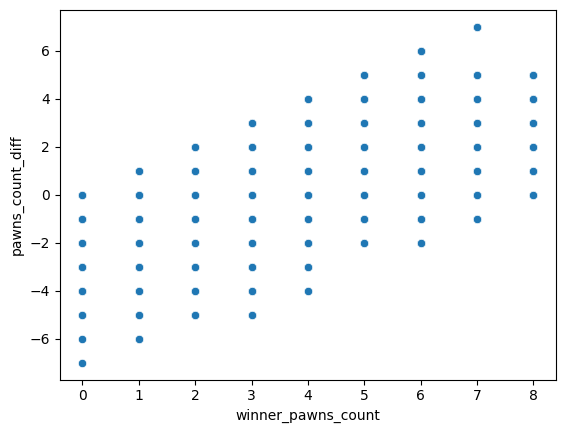

In [25]:
sns.scatterplot(x="winner_pawns_count",y="pawns_count_diff", data=all_games_df)

## Material difference

todo  calculate difference in number of pieces (materical count includes pawns)


In [26]:
all_games_df.columns

Index(['date', 'url', 'start_time', 'end_time', 'time_class', 'time_control',
       'white_username', 'black_username', 'user_colour', 'user_rating',
       'result', 'winner', 'higher_rated_colour', 'white_rating',
       'black_rating', 'white_result', 'black_result', 'winner_rating_diff',
       'user_rating_diff', 'opening_name', 'opening_code', 'w_cstl_side',
       'w_cstl_move', 'b_cstl_side', 'b_cstl_move', 'user_castled',
       'opp_castled', 'winner_ttl_pieces_count', 'loser_ttl_pieces_count',
       'winner_pawns_count', 'loser_pawns_count', 'winner_pieces_only_count',
       'loser_pieces_only_count', 'pieces_count_diff', 'pawns_count_diff',
       'winner_material_ttl', 'loser_material_ttl', 'winner_pcs', 'loser_pcs',
       'user_win'],
      dtype='object')

In [27]:
material_cols = [
    #meta
    'time_class'
    ,'winner_rating_diff'
    ,'user_rating_diff'
    ,'user_win'
    #material
    ,'winner_ttl_pieces_count', 'loser_ttl_pieces_count'
    ,'winner_pawns_count', 'loser_pawns_count'
    ,'winner_pieces_only_count','loser_pieces_only_count'
    ,'pieces_count_diff', 'pawns_count_diff'
    ,'winner_material_ttl', 'loser_material_ttl'
    ,'winner_pcs', 'loser_pcs'
    ]
material_df = all_games_df[material_cols]
material_df.tail(3)

,time_class,winner_rating_diff,user_rating_diff,user_win,winner_ttl_pieces_count,loser_ttl_pieces_count,winner_pawns_count,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs
4421,bullet,-19,-19,True,6,7,4,3,1,3,-2,1,9,22,"['P', 'P', 'K', 'P', 'P', 'R']","['r', 'q', 'k', 'r', 'p', 'p', 'p']"
4422,bullet,35,-35,False,13,13,6,6,6,6,0,0,34,34,"['Q', 'P', 'B', 'N', 'N', 'P', 'P', 'P', 'P', ...","['r', 'k', 'r', 'p', 'p', 'n', 'p', 'b', 'p', ..."
4423,bullet,-3,-3,True,9,6,6,4,2,1,1,2,20,7,"['Q', 'R', 'P', 'P', 'P', 'P', 'P', 'P', 'K']","['p', 'p', 'p', 'n', 'p', 'k']"


In [28]:
material_df.dtypes

time_class                  object
winner_rating_diff           int64
user_rating_diff             int64
user_win                      bool
winner_ttl_pieces_count      int64
loser_ttl_pieces_count       int64
winner_pawns_count           int64
loser_pawns_count            int64
winner_pieces_only_count     int64
loser_pieces_only_count      int64
pieces_count_diff            int64
pawns_count_diff             int64
winner_material_ttl          int64
loser_material_ttl           int64
winner_pcs                  object
loser_pcs                   object
dtype: object

In [29]:
material_df['material_diff'] = material_df.loc[:,'winner_material_ttl'] - material_df.loc[:,'loser_material_ttl']
material_df

/tmp/ipykernel_27550/2677640724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  material_df['material_diff'] = material_df.loc[:,'winner_material_ttl'] - material_df.loc[:,'loser_material_ttl']


,time_class,winner_rating_diff,user_rating_diff,user_win,winner_ttl_pieces_count,loser_ttl_pieces_count,winner_pawns_count,loser_pawns_count,winner_pieces_only_count,loser_pieces_only_count,pieces_count_diff,pawns_count_diff,winner_material_ttl,loser_material_ttl,winner_pcs,loser_pcs,material_diff
0,blitz,-8,8,False,2,1,0,0,1,0,1,0,9,0,"['K', 'Q']",['k'],9
1,blitz,58,58,True,7,2,4,1,2,0,2,3,12,1,"['p', 'p', 'p', 'p', 'n', 'k', 'r']","['P', 'K']",11
2,blitz,122,-122,False,8,4,5,2,2,1,1,3,19,7,"['P', 'P', 'Q', 'P', 'P', 'P', 'R', 'K']","['k', 'p', 'p', 'r']",12
3,blitz,-28,28,False,8,1,0,0,7,0,7,0,25,0,"['r', 'r', 'n', 'k', 'n', 'n', 'n', 'b']",['K'],25
4,rapid,90,90,True,5,6,2,4,2,1,1,-2,16,9,"['R', 'Q', 'P', 'K', 'P']","['k', 'p', 'p', 'p', 'p', 'r']",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,bullet,21,-21,False,7,8,5,5,1,2,-1,0,8,11,"['p', 'p', 'p', 'n', 'k', 'p', 'p']","['B', 'P', 'P', 'P', 'P', 'K', 'P', 'N']",-3
4420,bullet,37,-37,False,7,3,3,1,3,1,2,2,16,6,"['R', 'N', 'R', 'P', 'P', 'P', 'K']","['p', 'r', 'k']",10
4421,bullet,-19,-19,True,6,7,4,3,1,3,-2,1,9,22,"['P', 'P', 'K', 'P', 'P', 'R']","['r', 'q', 'k', 'r', 'p', 'p', 'p']",-13
4422,bullet,35,-35,False,13,13,6,6,6,6,0,0,34,34,"['Q', 'P', 'B', 'N', 'N', 'P', 'P', 'P', 'P', ...","['r', 'k', 'r', 'p', 'p', 'n', 'p', 'b', 'p', ...",0


(-10.0, 10.0)

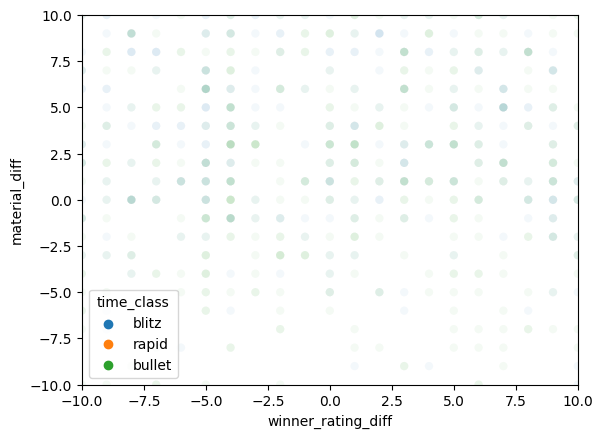

In [30]:
sns.scatterplot(x='winner_rating_diff', y='material_diff', data=material_df,
               alpha=0.05, hue='time_class')
plt.ylim(-10, 10)
plt.xlim(-10, 10)

# openings

In [31]:
all_games_df['opening_letter'] = all_games_df['opening_code'].apply(lambda x :x[0])
all_games_df['opening_letter']

0       A
1       C
2       B
3       C
4       A
       ..
4419    C
4420    B
4421    C
4422    D
4423    B
Name: opening_letter, Length: 4424, dtype: object

In [32]:
agg_dict = {
    "user_win" : "mean", "loser_pcs" : "count"
}
all_games_df.groupby(by="opening_letter").agg(agg_dict).rename(columns={"loser_pcs": "n_games"})

,user_win,n_games
opening_letter,,
A,0.520619,776
B,0.520331,1451
C,0.479305,1208
D,0.479508,976
E,0.384615,13


In [33]:
agg_dict = {
    "user_win" : "mean", "result" : "count", "opening_name" : "first"
}

openings_df = all_games_df.groupby(by=["opening_letter", "opening_code"]).agg(agg_dict).rename(columns={"result" : "n_games"})
openings_df

user_win  n_games  \
opening_letter opening_code                      
A              A00           0.515695      223   
               A01           0.500000       50   
               A02           0.000000        2   
               A03           0.480000       25   
               A04           0.347826       23   
...                               ...      ...   
E              E24           1.000000        1   
               E40           1.000000        1   
               E50           1.000000        1   
               E61           1.000000        1   
               E90           0.000000        1   

                                                                  opening_name  
opening_letter opening_code                                                     
A              A00                           Van-t-Kruijs-Opening-1...e5-2.Bc4  
               A01           Nimzowitsch-Larsen-Attack-Classical-Variation-...  
               A02                                   Birds-Opening-1...f5-2.d4  
               A03           Birds-Opening-Dutch-Variation-2.Nf3-g6-3.e3-Bg...  
               A04           Reti-Opening-Queenside-Fianchetto-Variation-2....  
...                                                                        ...  
E              E24               Nimzo-Indian-Defense-Samisch-Variation-5...b6  
               E40                            Nimzo-Indian-Defense-Normal-Line  
               E50              Nimzo-Indian-Defense-Normal-Line-4...O-O-5.Nf3  
               E61                       Kings-Indian-Defense-Normal-Variation  
               E90           Kings-Indian-Defense-Normal-Variation-4.e4-d6-...  

[140 rows x 3 columns]

In [34]:
openings_df.index.get_level_values(0)

Index(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       ...
       'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'],
      dtype='object', name='opening_letter', length=140)

In [35]:
openings = ["A", "B", "C", "D", "E"]
for letter in openings:
    display(openings_df.loc[letter, :].sort_values(by="n_games", ascending=False))

,user_win,n_games,opening_name
opening_code,,,
A00,0.515695,223,Van-t-Kruijs-Opening-1...e5-2.Bc4
A40,0.528302,159,Queens-Pawn-Opening-English-Defense-3.e4-Bb7-4...
A06,0.619565,92,Reti-Opening-1...d5
A45,0.576923,52,Indian-Game-2.Bf4
A01,0.500000,50,Nimzowitsch-Larsen-Attack-Classical-Variation-...
A43,0.400000,25,Old-Benoni-Defense-2.e3-e6
A03,0.480000,25,Birds-Opening-Dutch-Variation-2.Nf3-g6-3.e3-Bg...
A04,0.347826,23,Reti-Opening-Queenside-Fianchetto-Variation-2....
A10,0.500000,20,English-Opening


,user_win,n_games,opening_name
opening_code,,,
B01,0.523810,693,Scandinavian-Defense-Mieses-Kotrc-Variation-3.Nc3
B00,0.537879,132,Owens-Defense-2.d4-Bb7-3.f3
B06,0.578125,128,Modern-Defense-with-1-e4-2.d4-Bg7
B10,0.481481,81,Caro-Kann-Defense-2.Nf3-d5
B07,0.500000,72,Pirc-Defense-Modern-Defense-Geller-System-2......
B12,0.549296,71,Caro-Kann-Defense-Advance-Short-Variation-with...
B20,0.491803,61,Sicilian-Defense-Snyder-Variation-2...e5-3.Bb2
B23,0.500000,48,Closed-Sicilian-Defense-Traditional-Line-3.Nf3...
B22,0.473684,38,Alapin-Sicilian-Defense-2...e6-3.d4-cxd4-4.cxd4


,user_win,n_games,opening_name
opening_code,,,
C25,0.486486,185,Vienna-Game-2...d6-3.Bc4
C00,0.507042,142,French-Defense-Normal-Variation
C20,0.488000,125,Kings-Pawn-Opening-Leonardis-Variation
C50,0.438596,114,Giuoco-Piano-Game-Giuoco-Pianissimo-Variation
C23,0.402985,67,Bishops-Opening
C41,0.433333,60,Philidor-Defense-3.d4-Bg4
C45,0.404255,47,Scotch-Game
C28,0.523810,42,Bishops-Opening-Berlin-Vienna-Hybrid-Variation...
C02,0.550000,40,French-Defense-Advance-Paulsen-Attack-5...Qb6


,user_win,n_games,opening_name
opening_code,,,
D00,0.495745,470,Queens-Pawn-Opening-Accelerated-London-System
D02,0.475000,280,Queens-Pawn-Opening-Zukertort-Chigorin-Variati...
D10,0.422222,45,Slav-Defense-3.e3-e6
D20,0.343750,32,Queens-Gambit-Accepted-Old-Variation-3...e6-4....
D06,0.363636,22,Queens-Gambit-Declined-Baltic-Defense
D07,0.526316,19,Queens-Gambit-Declined-Chigorin-Defense-3.e3
D04,0.647059,17,Colle-System-3...c6-4.Bd3-Bg4
D31,0.352941,17,Queens-Gambit-Declined-Semi-Slav-Defense-Accel...
D11,0.437500,16,Slav-Defense-Modern-Line-3...Bg4


,user_win,n_games,opening_name
opening_code,,,
E00,0.0,4,Indian-Game-East-Indian-Defense-3.Nc3-b6
E21,0.5,2,Nimzo-Indian-Defense-Three-Knights-Variation-4...
E01,0.0,1,Catalan-Opening-Closed-4...dxc4-5.Nf3-c6-6.O-O
E10,0.0,1,Indian-Game-East-Indian-Anti-Nimzo-Indian-Vari...
E24,1.0,1,Nimzo-Indian-Defense-Samisch-Variation-5...b6
E40,1.0,1,Nimzo-Indian-Defense-Normal-Line
E50,1.0,1,Nimzo-Indian-Defense-Normal-Line-4...O-O-5.Nf3
E61,1.0,1,Kings-Indian-Defense-Normal-Variation
E90,0.0,1,Kings-Indian-Defense-Normal-Variation-4.e4-d6-...


In [36]:
openings_df

user_win  n_games  \
opening_letter opening_code                      
A              A00           0.515695      223   
               A01           0.500000       50   
               A02           0.000000        2   
               A03           0.480000       25   
               A04           0.347826       23   
...                               ...      ...   
E              E24           1.000000        1   
               E40           1.000000        1   
               E50           1.000000        1   
               E61           1.000000        1   
               E90           0.000000        1   

                                                                  opening_name  
opening_letter opening_code                                                     
A              A00                           Van-t-Kruijs-Opening-1...e5-2.Bc4  
               A01           Nimzowitsch-Larsen-Attack-Classical-Variation-...  
               A02                                   Birds-Opening-1...f5-2.d4  
               A03           Birds-Opening-Dutch-Variation-2.Nf3-g6-3.e3-Bg...  
               A04           Reti-Opening-Queenside-Fianchetto-Variation-2....  
...                                                                        ...  
E              E24               Nimzo-Indian-Defense-Samisch-Variation-5...b6  
               E40                            Nimzo-Indian-Defense-Normal-Line  
               E50              Nimzo-Indian-Defense-Normal-Line-4...O-O-5.Nf3  
               E61                       Kings-Indian-Defense-Normal-Variation  
               E90           Kings-Indian-Defense-Normal-Variation-4.e4-d6-...  

[140 rows x 3 columns]

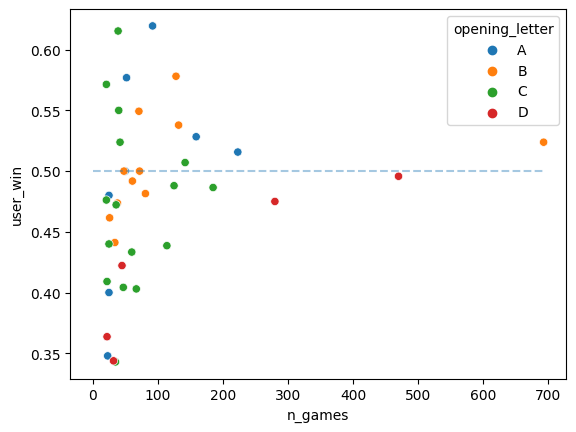

In [37]:
sns.scatterplot(x="n_games", y="user_win", data=openings_df.query("n_games > 20"), hue='opening_letter')
plt.hlines(y=0.5, xmin=0, xmax=openings_df.n_games.max(), linestyle='--', alpha=0.4)

# Moves

In [38]:
all_games_df.columns

Index(['date', 'url', 'start_time', 'end_time', 'time_class', 'time_control',
       'white_username', 'black_username', 'user_colour', 'user_rating',
       'result', 'winner', 'higher_rated_colour', 'white_rating',
       'black_rating', 'white_result', 'black_result', 'winner_rating_diff',
       'user_rating_diff', 'opening_name', 'opening_code', 'w_cstl_side',
       'w_cstl_move', 'b_cstl_side', 'b_cstl_move', 'user_castled',
       'opp_castled', 'winner_ttl_pieces_count', 'loser_ttl_pieces_count',
       'winner_pawns_count', 'loser_pawns_count', 'winner_pieces_only_count',
       'loser_pieces_only_count', 'pieces_count_diff', 'pawns_count_diff',
       'winner_material_ttl', 'loser_material_ttl', 'winner_pcs', 'loser_pcs',
       'user_win', 'opening_letter'],
      dtype='object')